In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import xgboost as xgb
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# The features in this dataset


Your goal is to predict the operating condition of a waterpoint for each record in the dataset. You are provided the following set of information about the waterpoints:

* **amount_tsh** - Total static head (amount water available to waterpoint)
* **date_recorded** - The date the row was entered
* **funder** - Who funded the well
* **gps_height** - Altitude of the well
* **installer** - Organization that installed the well
* **longitude** - GPS coordinate
* **latitude** - GPS coordinate
* **wpt_name** - Name of the waterpoint if there is one
* **num_private** -
* **basin** - Geographic water basin
* **subvillage** - Geographic location
* **region** - Geographic location
* **region_code** - Geographic location (coded)
* **district_code** - Geographic location (coded)
* **lga** - Geographic location
* **ward** - Geographic location
* **population** - Population around the well
* **public_meeting** - True/False
* **recorded_by** - Group entering this row of data
* **scheme_management** - Who operates the waterpoint
* **scheme_name** - Who operates the waterpoint
* **permit** - If the waterpoint is permitted
* **construction_year** - Year the waterpoint was constructed
* **extraction_type** - The kind of extraction the waterpoint uses
* **extraction_type_group** - The kind of extraction the waterpoint uses
* **extraction_type_class** - The kind of extraction the waterpoint uses
* **management** - How the waterpoint is managed
* **management_group** - How the waterpoint is managed
* **payment** - What the water costs
* **payment_type** - What the water costs
* **water_quality** - The quality of the water
* **quality_group** - The quality of the water
* **quantity** - The quantity of water
* **quantity_group** - The quantity of water
* **source** - The source of the water
* **source_type** - The source of the water
* **source_class** - The source of the water
* **waterpoint_type** - The kind of waterpoint
* **waterpoint_type_group** - The kind of waterpoint



Distribution of Labels
The labels in this dataset are simple. There are three possible values:

* **functional** - the waterpoint is operational and there are no repairs needed
* **functional needs repair** - the waterpoint is operational, but needs repairs
* **non functional** - the waterpoint is not operational

[https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/)

In [60]:
test_set = pd.read_csv('data/test_set_values.csv')
train_values = pd.read_csv('data/training_set_values.csv')
train_labels = pd.read_csv('data/training_set_labels.csv')

In [61]:
training_set = pd.merge(train_values, train_labels, on = 'id', how = 'outer')

In [62]:
# importing clean data sets for later modeling
merged_clean = pd.read_csv('clean_merged.csv')
test_clean = pd.read_csv('clean_test.csv')

In [63]:
training_set.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [64]:
training_set.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

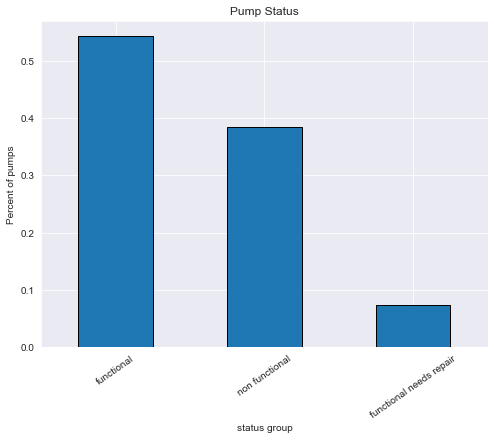

In [65]:
sns.set_style('darkgrid')
training_set['status_group'].value_counts(normalize = True).plot.bar(figsize = (8, 6), edgecolor = 'black')
plt.title('Pump Status')
plt.ylabel('Percent of pumps')
plt.xlabel('status group')
plt.xticks(rotation = 35)
#plt.savefig('status_group_bar_percent2.png')

In [9]:
# seeing if time periods have an affect on functionality of wells

In [10]:
time_df = pd.DataFrame([])
time_df['status_group'] = training_set['status_group']
time_df['construction_year'] = training_set['construction_year']
time_df.head()

,status_group,construction_year
0,functional,1999
1,functional,2010
2,functional,2009
3,non functional,1986
4,functional,0


In [11]:
time_df.construction_year.value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [12]:
zeros = time_df[time_df['construction_year'] == 0].index
time_df.drop(zeros, inplace = True)

In [13]:
time_df.construction_year.value_counts().head()

2010    2645
2008    2613
2009    2533
2000    2091
2007    1587
Name: construction_year, dtype: int64

In [14]:
# bring back the bins form clean data

bins = [1960, 1970, 1980, 1990, 2000, 2010, 2015]
periods = ['1960-1969', '1970-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2015']

time_df['construction_periods'] = pd.cut(time_df['construction_year'], bins ,
                                         labels = periods, right = False) 

In [15]:
time_df.head()

,status_group,construction_year,construction_periods
0,functional,1999,1990-1999
1,functional,2010,2010-2015
2,functional,2009,2000-2009
3,non functional,1986,1980-1989
5,functional,2009,2000-2009


In [16]:
time_df.construction_periods.value_counts()

2000-2009    15330
1990-1999     7678
1980-1989     5578
2010-2015     5161
1970-1979     4406
1960-1969      538
Name: construction_periods, dtype: int64

In [17]:
time_periods = time_df.groupby('status_group')['construction_periods'].value_counts().unstack()

In [18]:
time_periods.head()

construction_periods,1960-1969,1970-1979,1980-1989,1990-1999,2000-2009,2010-2015
status_group,,,,,,
functional,156,1406,2220,4139,9989,3794
functional needs repair,42,348,423,518,977,220
non functional,340,2652,2935,3021,4364,1147


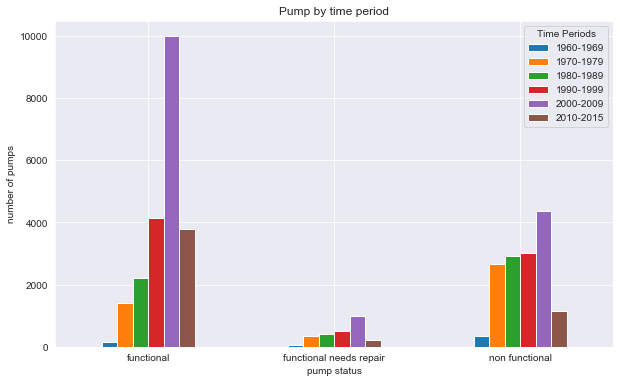

In [44]:
time_periods.plot.bar(figsize = (10, 6))
plt.title('Pump by time period')
plt.xlabel('pump status')
plt.ylabel('number of pumps')
plt.xticks(rotation = 0)
plt.legend(title = 'Time Periods')
#plt.savefig('time_periods.png')

In [20]:
#  looks like the newer the pumps the more likely they will be functional
# the older pumps the pumps were constructed the more likley they will be non functional

In [21]:
# looking at payment type
payment = merged_clean.groupby('status_group')['payment_type'].value_counts(normalize = True).unstack()


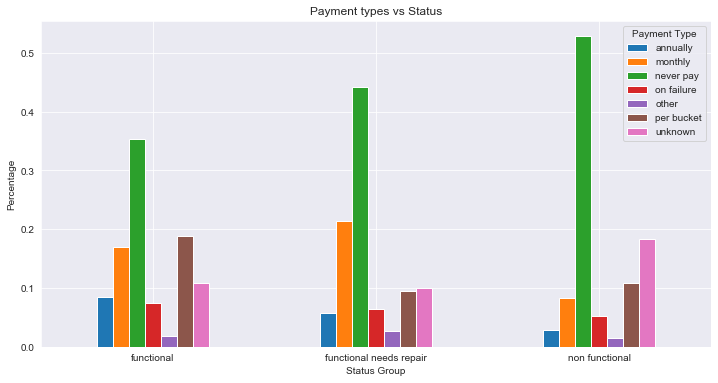

In [45]:
payment.plot.bar(figsize = (12, 6))
plt.xticks(rotation = 0)
plt.title('Payment types vs Status')
plt.legend(title = 'Payment Type')
plt.xlabel('Status Group')
plt.ylabel('Percentage')
#plt.savefig('payment_types.png')

In [23]:
merged_clean.head()

,Unnamed: 0,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,permit,extraction_type_class,management,payment_type,water_quality,quantity,source,waterpoint_type,status_group,construction_periods
0,0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,False,gravity,vwc,annually,soft,enough,spring,communal standpipe,functional,1990 - 1999
1,1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,True,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional,2010 - 2015
2,2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,True,gravity,vwc,per bucket,soft,enough,dam,communal standpipe multiple,functional,2000 - 2009
3,3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,True,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional,1980 - 1989
4,4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,True,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional,NaN


In [49]:
quantity_df = merged_clean.groupby('quantity')['status_group'].value_counts().unstack()

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

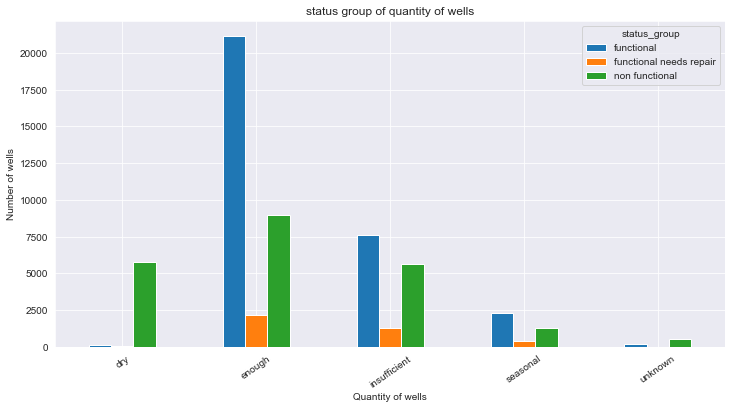

In [50]:
quantity_df.plot.bar(figsize = (12, 6))
plt.title('status group of quantity of wells')
plt.xlabel('Quantity of wells')
plt.ylabel('Number of wells')
plt.xticks(rotation = 35)
#plt.savefig('quantity_of_wells.png')

In [26]:
# makes sense that the dry wells are non functional while the wells that have enough water
# to work are the most fuctional with little non fuctionals

In [27]:
# need to look at how the wells get their water

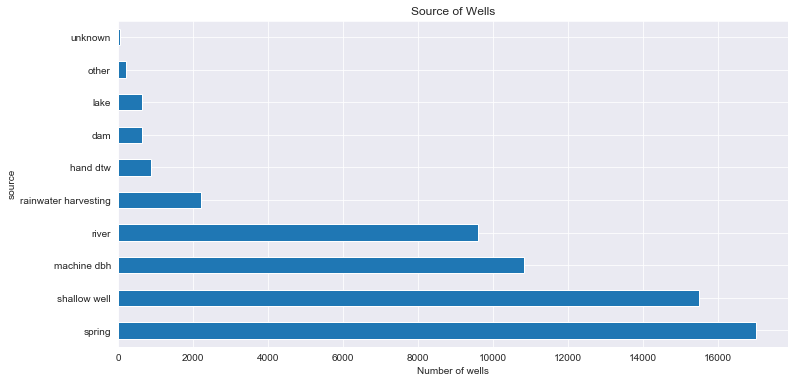

In [53]:
merged_clean.source.value_counts().plot.barh(figsize = (12, 6))
plt.title('Source of Wells')
plt.ylabel('source')
plt.xlabel('Number of wells')
#plt.savefig('source_of_wells.png')

In [29]:
#. looking at the most popular water source helps with deciding where to build 
#  water pumps at

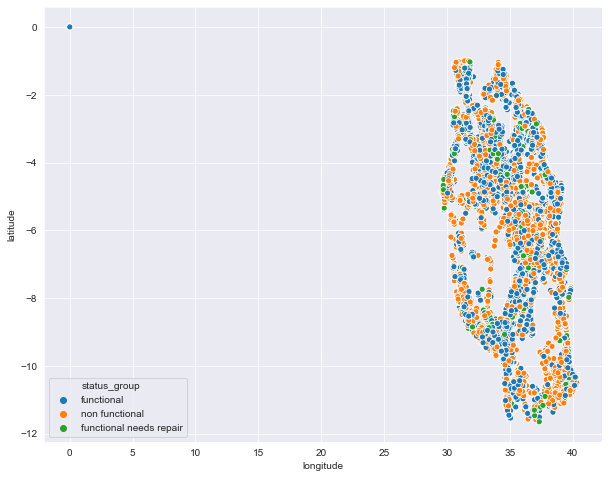

In [30]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x = 'longitude', y = 'latitude' , data = merged_clean, hue = 'status_group')

In [31]:
# i see that one has coordinates of 0,0 so i will remove that one

In [32]:
zero_long = merged_clean[merged_clean['longitude'] == 0].index

In [33]:
merged_clean.drop(zero_long, inplace = True)

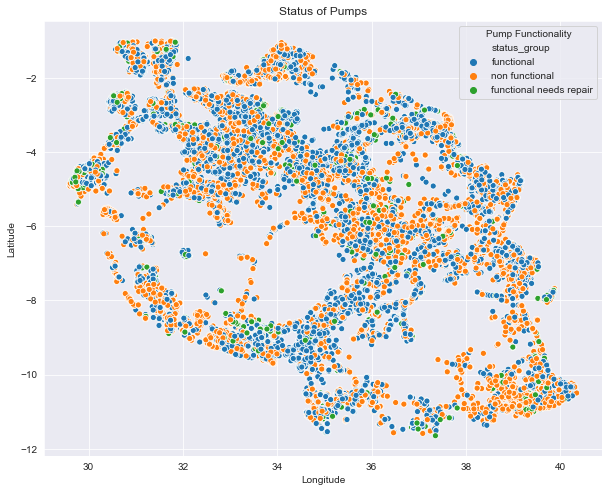

In [39]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'longitude', y = 'latitude', data = merged_clean, hue = 'status_group')
plt.title('Status of Pumps')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.legend(title = 'Pump Functionality')
#plt.savefig('status_group_map.png')

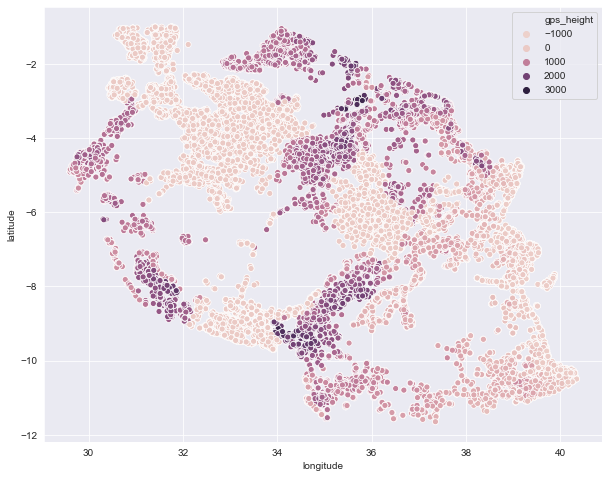

In [35]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x = 'longitude', y = 'latitude', data = merged_clean, hue = 'gps_height')

In [36]:
merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57588 entries, 0 to 59399
Data columns (total 29 columns):
Unnamed: 0               57588 non-null int64
id                       57588 non-null int64
amount_tsh               57588 non-null float64
date_recorded            57588 non-null object
funder                   53966 non-null object
gps_height               57588 non-null int64
installer                53952 non-null object
longitude                57588 non-null float64
latitude                 57588 non-null float64
wpt_name                 57588 non-null object
basin                    57588 non-null object
subvillage               57217 non-null object
region                   57588 non-null object
region_code              57588 non-null int64
district_code            57588 non-null int64
lga                      57588 non-null object
ward                     57588 non-null object
population               57588 non-null int64
public_meeting           54612 non-null object
p

In [37]:
merged_clean.head()

,Unnamed: 0,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,permit,extraction_type_class,management,payment_type,water_quality,quantity,source,waterpoint_type,status_group,construction_periods
0,0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,False,gravity,vwc,annually,soft,enough,spring,communal standpipe,functional,1990 - 1999
1,1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,True,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional,2010 - 2015
2,2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,True,gravity,vwc,per bucket,soft,enough,dam,communal standpipe multiple,functional,2000 - 2009
3,3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,True,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional,1980 - 1989
4,4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,True,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional,NaN


In [38]:
merged_clean.drop(columns = ['Unnamed: 0'],axis = 1, inplace = True)

In [39]:
merged_clean.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3622
gps_height                   0
installer                 3636
longitude                    0
latitude                     0
wpt_name                     0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            2976
permit                    3056
extraction_type_class        0
management                   0
payment_type                 0
water_quality                0
quantity                     0
source                       0
waterpoint_type              0
status_group                 0
construction_periods     18897
dtype: int64

In [40]:
# setting up training data for modeling

In [41]:
merged_clean.shape, test_clean.shape

((57588, 28), (14850, 28))

In [42]:
merged_clean.columns.difference(test_clean.columns)

Index(['construction_periods', 'status_group'], dtype='object')

In [43]:
test_clean.columns.difference(merged_clean.columns)

Index(['Unnamed: 0', 'construction_year'], dtype='object')

In [44]:
merged_clean.drop(columns = ['construction_periods'], inplace = True)
test_clean.drop(columns = ['Unnamed: 0', 'construction_year'], inplace = True)

In [45]:
merged_clean.columns.difference(test_clean.columns)

Index(['status_group'], dtype='object')

In [46]:
from pandas.api.types import is_string_dtype, is_numeric_dtype

In [47]:
def train_cats(merged_clean):
    for a,b in merged_clean.items():
        if is_string_dtype(b): merged_clean[a] = b.astype('category').cat.as_ordered()

In [48]:
train_cats(merged_clean)

In [49]:
merged_clean.drop(columns = ['funder', 'installer', 'subvillage', 'date_recorded'], inplace = True)

In [50]:
merged_clean.drop('wpt_name', axis = 1, inplace = True)

In [51]:
merged_clean.isna().sum() / len(merged_clean)

id                       0.000000
amount_tsh               0.000000
gps_height               0.000000
longitude                0.000000
latitude                 0.000000
basin                    0.000000
region                   0.000000
region_code              0.000000
district_code            0.000000
lga                      0.000000
ward                     0.000000
population               0.000000
public_meeting           0.051677
permit                   0.053067
extraction_type_class    0.000000
management               0.000000
payment_type             0.000000
water_quality            0.000000
quantity                 0.000000
source                   0.000000
waterpoint_type          0.000000
status_group             0.000000
dtype: float64

In [52]:
#. filling training set of missing values with the mode

In [53]:
merged_clean.permit.unique()

[False, True, NaN]
Categories (2, object): [False < True]

In [54]:
merged_clean.permit.fillna(merged_clean['permit'].mode()[0], inplace = True)

In [55]:
merged_clean.permit.unique()

[False, True]
Categories (2, object): [False < True]

In [56]:
merged_clean.public_meeting.unique()

[True, NaN, False]
Categories (2, object): [False < True]

In [57]:
merged_clean.public_meeting.fillna(merged_clean['public_meeting'].mode()[0], inplace = True)

In [58]:
merged_clean.public_meeting.unique()

[True, False]
Categories (2, object): [False < True]

In [59]:
merged_clean.isna().sum() / len(merged_clean)

id                       0.0
amount_tsh               0.0
gps_height               0.0
longitude                0.0
latitude                 0.0
basin                    0.0
region                   0.0
region_code              0.0
district_code            0.0
lga                      0.0
ward                     0.0
population               0.0
public_meeting           0.0
permit                   0.0
extraction_type_class    0.0
management               0.0
payment_type             0.0
water_quality            0.0
quantity                 0.0
source                   0.0
waterpoint_type          0.0
status_group             0.0
dtype: float64

In [60]:
merged_clean.head()

,id,amount_tsh,gps_height,longitude,latitude,basin,region,region_code,district_code,lga,...,public_meeting,permit,extraction_type_class,management,payment_type,water_quality,quantity,source,waterpoint_type,status_group
0,69572,6000.0,1390,34.938093,-9.856322,Lake Nyasa,Iringa,11,5,Ludewa,...,True,False,gravity,vwc,annually,soft,enough,spring,communal standpipe,functional
1,8776,0.0,1399,34.698766,-2.147466,Lake Victoria,Mara,20,2,Serengeti,...,True,True,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional
2,34310,25.0,686,37.460664,-3.821329,Pangani,Manyara,21,4,Simanjiro,...,True,True,gravity,vwc,per bucket,soft,enough,dam,communal standpipe multiple,functional
3,67743,0.0,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,90,63,Nanyumbu,...,True,True,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional
4,19728,0.0,0,31.130847,-1.825359,Lake Victoria,Kagera,18,1,Karagwe,...,True,True,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional


In [61]:
cols = merged_clean.select_dtypes(exclude = [np.number])

In [62]:
list(cols)

['basin',
 'region',
 'lga',
 'ward',
 'public_meeting',
 'permit',
 'extraction_type_class',
 'management',
 'payment_type',
 'water_quality',
 'quantity',
 'source',
 'waterpoint_type',
 'status_group']

In [63]:
dummy_train = pd.get_dummies(merged_clean, columns = ['basin', 
                                                      'region', 
                                                      'public_meeting', 
                                                      'permit', 
                                                      'extraction_type_class', 
                                                      'management',
                                                      'payment_type', 
                                                      'water_quality',
                                                      'quantity',
                                                      'source',
                                                      'waterpoint_type'])

In [64]:
dummy_train.columns

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       ...
       'source_shallow well', 'source_spring', 'source_unknown',
       'waterpoint_type_cattle trough', 'waterpoint_type_communal standpipe',
       'waterpoint_type_communal standpipe multiple', 'waterpoint_type_dam',
       'waterpoint_type_hand pump', 'waterpoint_type_improved spring',
       'waterpoint_type_other'],
      dtype='object', length=101)

In [65]:
dummy_train.shape

(57588, 101)

In [66]:
target = train_labels

In [68]:
clean_df = pd.merge(dummy_train, target)

In [69]:
clean_df.status_group.unique()

array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

In [70]:
clean_df.shape

(57588, 101)

In [71]:
# setting up test data for modeling

In [72]:
test_clean.shape

(14850, 26)

In [73]:
test_clean.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'basin', 'subvillage',
       'region', 'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'permit', 'extraction_type_class', 'management',
       'payment_type', 'water_quality', 'quantity', 'source',
       'waterpoint_type'],
      dtype='object')

In [76]:
def test_cats(test_clean):
    for a,b in test_clean.items():
        if is_string_dtype(b): test_clean[a] = b.astype('category').cat.as_ordered()

In [77]:
test_cats(test_clean)

In [78]:
test_clean.isna().sum() / len(test_clean)

id                       0.000000
amount_tsh               0.000000
date_recorded            0.000000
funder                   0.058519
gps_height               0.000000
installer                0.059057
longitude                0.000000
latitude                 0.000000
wpt_name                 0.000000
basin                    0.000000
subvillage               0.006667
region                   0.000000
region_code              0.000000
district_code            0.000000
lga                      0.000000
ward                     0.000000
population               0.000000
public_meeting           0.055286
permit                   0.049630
extraction_type_class    0.000000
management               0.000000
payment_type             0.000000
water_quality            0.000000
quantity                 0.000000
source                   0.000000
waterpoint_type          0.000000
dtype: float64

In [79]:
test_clean.drop(columns = ['funder', 'installer', 'wpt_name', 
                           'date_recorded', 'subvillage'], axis = 1, inplace = True)

In [80]:
test_clean.isna().sum() / len(test_clean)

id                       0.000000
amount_tsh               0.000000
gps_height               0.000000
longitude                0.000000
latitude                 0.000000
basin                    0.000000
region                   0.000000
region_code              0.000000
district_code            0.000000
lga                      0.000000
ward                     0.000000
population               0.000000
public_meeting           0.055286
permit                   0.049630
extraction_type_class    0.000000
management               0.000000
payment_type             0.000000
water_quality            0.000000
quantity                 0.000000
source                   0.000000
waterpoint_type          0.000000
dtype: float64

In [81]:
test_clean.public_meeting.unique()

[True, NaN, False]
Categories (2, object): [False < True]

In [36]:
# filling test set missing values with mode
#
#

In [83]:
test_clean.public_meeting.fillna(test_clean['public_meeting'].mode()[0], inplace = True)

In [84]:
test_clean.public_meeting.unique()

[True, False]
Categories (2, object): [False < True]

In [85]:
test_clean.permit.unique()

[True, NaN, False]
Categories (2, object): [False < True]

In [86]:
test_clean.permit.fillna(test_clean['permit'].mode()[0], inplace = True)

In [87]:
test_clean.permit.unique()

[True, False]
Categories (2, object): [False < True]

In [88]:
test_clean.isna().sum() / len(test_clean)

id                       0.0
amount_tsh               0.0
gps_height               0.0
longitude                0.0
latitude                 0.0
basin                    0.0
region                   0.0
region_code              0.0
district_code            0.0
lga                      0.0
ward                     0.0
population               0.0
public_meeting           0.0
permit                   0.0
extraction_type_class    0.0
management               0.0
payment_type             0.0
water_quality            0.0
quantity                 0.0
source                   0.0
waterpoint_type          0.0
dtype: float64

In [89]:
cols_test = test_clean.select_dtypes(exclude = [np.number])

In [90]:
list(cols_test)

['basin',
 'region',
 'lga',
 'ward',
 'public_meeting',
 'permit',
 'extraction_type_class',
 'management',
 'payment_type',
 'water_quality',
 'quantity',
 'source',
 'waterpoint_type']

In [91]:
dummy_test = pd.get_dummies(test_clean, columns = ['basin',
                                                   'region',
                                                   'public_meeting',
                                                   'permit',
                                                   'extraction_type_class',
                                                   'management',
                                                   'payment_type',
                                                   'water_quality',
                                                   'quantity',
                                                   'source',
                                                   'waterpoint_type'])

In [92]:
dummy_test.columns

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'basin_Internal', 'basin_Lake Nyasa', 'basin_Lake Rukwa',
       'basin_Lake Tanganyika', 'basin_Lake Victoria', 'basin_Pangani',
       'basin_Rufiji', 'basin_Ruvuma / Southern Coast', 'basin_Wami / Ruvu',
       'region_Arusha', 'region_Dar es Salaam', 'region_Dodoma',
       'region_Iringa', 'region_Kagera', 'region_Kigoma', 'region_Kilimanjaro',
       'region_Lindi', 'region_Manyara', 'region_Mara', 'region_Mbeya',
       'region_Morogoro', 'region_Mtwara', 'region_Mwanza', 'region_Pwani',
       'region_Rukwa', 'region_Ruvuma', 'region_Shinyanga', 'region_Singida',
       'region_Tabora', 'region_Tanga', 'public_meeting_False',
       'public_meeting_True', 'permit_False', 'permit_True',
       'extraction_type_class_gravity', 'extraction_type_class_handpump',
       'extraction_type_class_motorpump', 'extraction_type_class_other',
       'e

In [93]:
dummy_test.shape

(14850, 100)

In [94]:
dummy_test.shape, clean_df.shape

((14850, 100), (57588, 101))

In [137]:
# modeling Decision tree

In [95]:
clean_df.drop(columns = ['lga', 'ward'], axis = 1, inplace = True)

In [96]:
clean_df.head()

,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,status_group,basin_Internal,...,source_shallow well,source_spring,source_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
0,69572,6000.0,1390,34.938093,-9.856322,11,5,109,functional,0,...,0,1,0,0,1,0,0,0,0,0
1,8776,0.0,1399,34.698766,-2.147466,20,2,280,functional,0,...,0,0,0,0,1,0,0,0,0,0
2,34310,25.0,686,37.460664,-3.821329,21,4,250,functional,0,...,0,0,0,0,0,1,0,0,0,0
3,67743,0.0,263,38.486161,-11.155298,90,63,58,non functional,0,...,0,0,0,0,0,1,0,0,0,0
4,19728,0.0,0,31.130847,-1.825359,18,1,0,functional,0,...,0,0,0,0,1,0,0,0,0,0


In [97]:
dummy_test.drop(columns = ['lga', 'ward'],axis = 1, inplace = True)

In [98]:
dummy_test.head()

,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,basin_Internal,basin_Lake Nyasa,...,source_shallow well,source_spring,source_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
0,50785,0.0,1996,35.290799,-4.059696,21,3,321,1,0,...,0,0,0,0,0,0,0,0,0,1
1,51630,0.0,1569,36.656709,-3.309214,2,2,300,0,0,...,0,1,0,0,1,0,0,0,0,0
2,17168,0.0,1567,34.767863,-5.004344,13,2,500,1,0,...,0,0,0,0,0,0,0,0,0,1
3,45559,0.0,267,38.058046,-9.418672,80,43,250,0,0,...,1,0,0,0,0,0,0,0,0,1
4,49871,500.0,1260,35.006123,-10.950412,10,3,60,0,0,...,0,1,0,0,1,0,0,0,0,0


In [99]:
clean_df.shape, dummy_test.shape

((57588, 99), (14850, 98))

In [100]:
clean_df.columns.difference(dummy_test.columns)

Index(['status_group'], dtype='object')

In [101]:
dummy_test.columns.difference(clean_df.columns)

Index([], dtype='object')

In [103]:
clean_df.to_csv('clean_train')

In [104]:
dummy_test.to_csv('test_dummy')